In [3]:
#importanto bibliotecas
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

#librerías modelos de ciencia de datos
from sklearn import metrics 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [27]:
#Lectura de datos en python

datos = pd.read_csv("heart_cleveland_upload.csv")

In [48]:
datos.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


In [6]:
#descripción de los datos
datos.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


Text(0.5, 1.0, 'identificación de datos fatantes y atipicos')

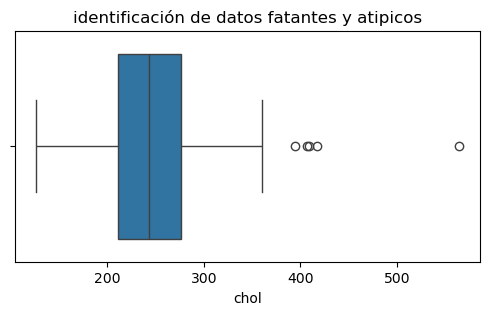

In [7]:
#identificación datos faltantes y atipicos

plt.figure(figsize=(6,3))
sns.boxplot(x=datos["chol"])
plt.title("identificación de datos fatantes y atipicos")


Text(0.5, 1.0, 'identificación de datos fatantes y atipicos')

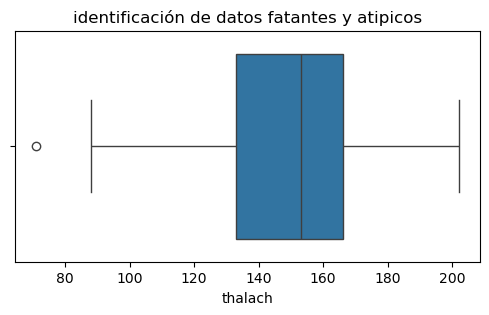

In [8]:
plt.figure(figsize=(6,3))
sns.boxplot(x=datos["thalach"])
plt.title("identificación de datos fatantes y atipicos")


Text(0.5, 1.0, 'identificación de datos fatantes y atipicos')

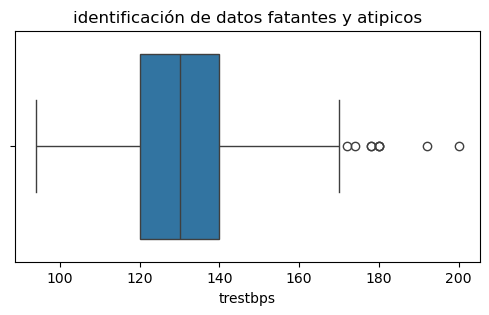

In [10]:
plt.figure(figsize=(6,3))
sns.boxplot(x=datos["trestbps"])
plt.title("identificación de datos fatantes y atipicos")

Text(0.5, 1.0, 'identificación de datos fatantes y atipicos')

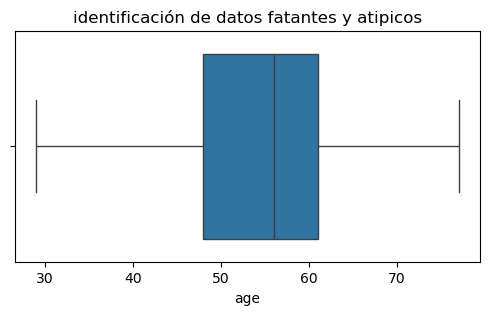

In [9]:
plt.figure(figsize=(6,3))
sns.boxplot(x=datos["age"])
plt.title("identificación de datos fatantes y atipicos")


In [12]:
#procesar los datos limpiándolos segun sea necesario

print("cantidad de registro en 0", datos["chol"].isin([0]).sum())

print("cantidad de registro en 0", datos["trestbps"].isin([0]).sum())

print("cantidad de registro en 0", datos["age"].isin([0]).sum())

print("cantidad de registro en 0", datos["thalach"].isin([0]).sum())

cantidad de registro en 0 0
cantidad de registro en 0 0
cantidad de registro en 0 0
cantidad de registro en 0 0


In [16]:

#Conteo datos atipicos


nivel_minimo =20
nivel_maximo =500

total_atipicos = ((datos ["chol"]<nivel_minimo) | (datos["chol"]>nivel_maximo)).sum()
print("el total de datos atipicos es ",format(total_atipicos))


el total de datos atipicos es  1


In [29]:
#filtrar datos atipicos

datos = datos[(datos["chol"]<nivel_maximo)&(datos["chol"]>nivel_minimo)]



In [30]:
#validar si se r3movieron los datos atipicos

total_atipicos = ((datos["chol"]<nivel_minimo) | (datos["chol"]>nivel_maximo)).sum()

print("el total de datos atipicos es ",format(total_atipicos))





el total de datos atipicos es  0


In [31]:
#tipo de datos y datos faltantes
datos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 296 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        296 non-null    int64  
 1   sex        296 non-null    int64  
 2   cp         296 non-null    int64  
 3   trestbps   296 non-null    int64  
 4   chol       296 non-null    int64  
 5   fbs        296 non-null    int64  
 6   restecg    296 non-null    int64  
 7   thalach    296 non-null    int64  
 8   exang      296 non-null    int64  
 9   oldpeak    296 non-null    float64
 10  slope      296 non-null    int64  
 11  ca         296 non-null    int64  
 12  thal       296 non-null    int64  
 13  condition  296 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 34.7 KB


In [49]:
#total se personas con enfermedad

datos["condition"].value_counts()

#datos["condition"].head(40)

condition
0    159
1    137
Name: count, dtype: int64

In [38]:
#dividir el dataset en train y en test para evaluar correctamente

#se crean variables x,y para evaluar la info del entrenamiento

X = datos.drop("condition" , axis= 1) #se cargan los datos sin la columna de condition

Y= datos["condition"] #datos de train con datos de columna condition

#La funcion train_test_split c43a una division ennjn vknjunto de datos en dos bloques, uno entrenamiento y otro de prueba

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, stratify=Y, random_state= 0)

print(X_train)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
232   57    0   3       128   303    0        2      159      0      0.0   
53    48    1   1       130   245    0        2      180      0      0.2   
102   58    1   2       140   211    1        2      165      0      0.0   
187   62    1   3       120   267    0        0       99      1      1.8   
169   66    1   3       160   228    0        2      138      0      2.3   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
73    71    0   2       110   265    1        2      130      0      0.0   
167   66    0   3       178   228    1        0      165      1      1.0   
154   37    0   2       120   215    0        0      170      0      0.0   
153   37    1   2       130   250    0        0      187      0      3.5   
259   51    0   3       130   305    0        0      142      1      1.2   

     slope  ca  thal  
232      0   1     0  
53       1   0     0  
102      0   0    

In [39]:
#construir modelo rgreesuon logistca

modelo_regresion = LogisticRegression(solver = "liblinear")
modelo_regresion.fit(X_train, Y_train)

#crea modelo de prediccion
prediccion = modelo_regresion.predict(X_test) #la funcion predict predice los valores a partir del conjunto de datos de validacion


In [40]:
print(Y_test)

112    0
250    1
240    1
211    1
285    0
      ..
172    0
136    1
138    0
201    1
258    1
Name: condition, Length: 74, dtype: int64


In [41]:
print(prediccion)

[0 1 1 1 0 0 1 1 1 0 0 0 0 1 1 0 0 1 0 1 0 0 1 1 0 1 1 1 0 1 1 1 0 0 0 0 0
 0 0 0 1 0 1 0 1 1 1 0 1 0 0 0 0 0 1 1 0 1 0 1 1 0 0 0 1 0 1 0 0 0 0 0 1 1]


In [42]:
#desempeño modelo de regresiom

print(classification_report(Y_test, prediccion))

              precision    recall  f1-score   support

           0       0.88      0.90      0.89        40
           1       0.88      0.85      0.87        34

    accuracy                           0.88        74
   macro avg       0.88      0.88      0.88        74
weighted avg       0.88      0.88      0.88        74



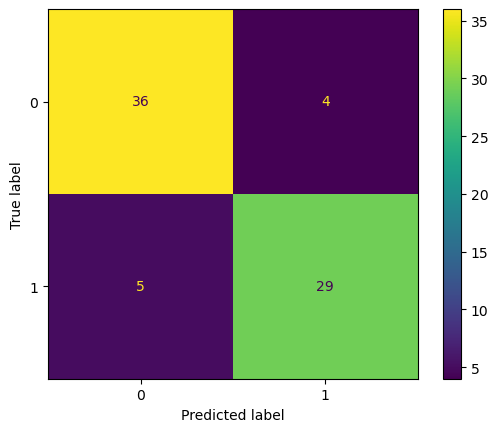

In [44]:
#matriz de confusion del modelo

cm =confusion_matrix(Y_test, prediccion)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

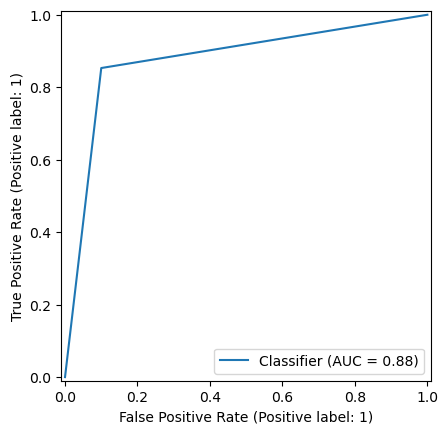

In [47]:
#curva presicion del modelo

from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(Y_test, prediccion)

plt.show()